# K-Means Clustering

Goal: When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend heavily on the domain itself, in this case, marketing.

## The data

1. age - age of the customer
2. job - job of the customer
3. education - education level of the customer
4. loan - has personal loan
5. contact - contact communication type
6. duration - last contact duration, in seconds
7. pdays - number of days that passed by after the client was last contacted (999 means client was not previously contacted)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploratory analysis

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,education,loan,contact,duration,pdays
0,56,housemaid,basic.4y,no,telephone,261,999
1,57,services,high.school,no,telephone,149,999
2,37,services,high.school,no,telephone,226,999
3,40,admin,basic.6y,no,telephone,151,999
4,56,services,high.school,yes,telephone,307,999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766 entries, 0 to 3765
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3766 non-null   int64 
 1   job        3766 non-null   object
 2   education  3766 non-null   object
 3   loan       3766 non-null   object
 4   contact    3766 non-null   object
 5   duration   3766 non-null   int64 
 6   pdays      3766 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 206.1+ KB


### Continuous feature analysis

<Axes: xlabel='age', ylabel='Count'>

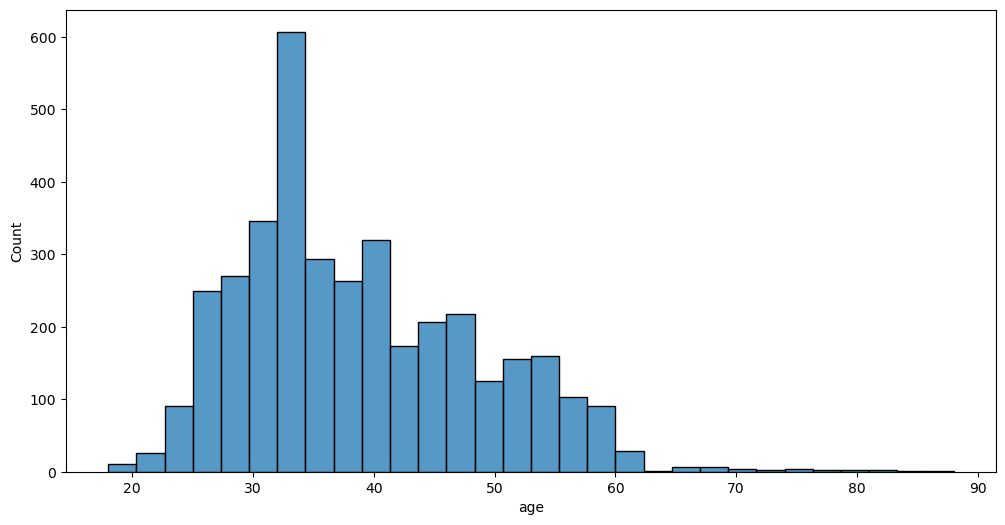

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30)

<Axes: xlabel='age', ylabel='Count'>

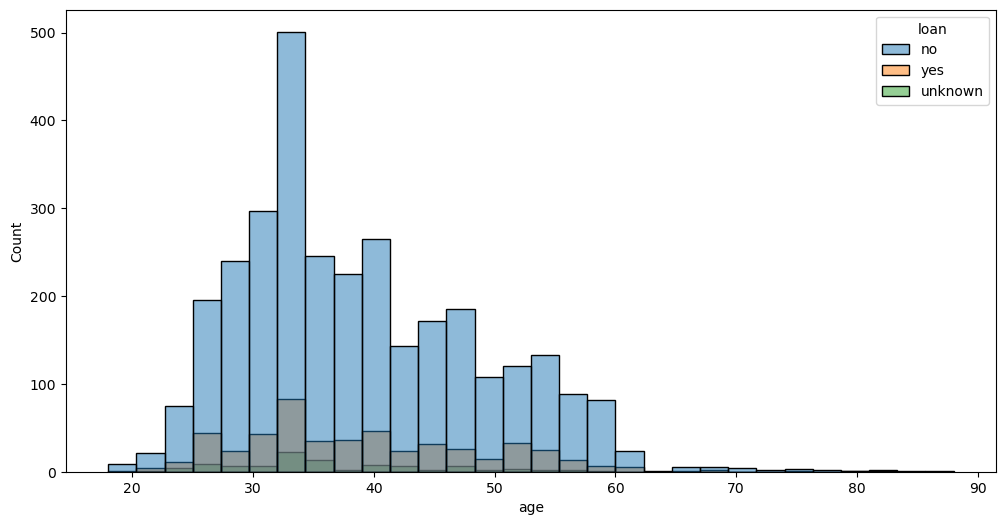

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='loan', bins=30)

<Axes: xlabel='pdays', ylabel='Count'>

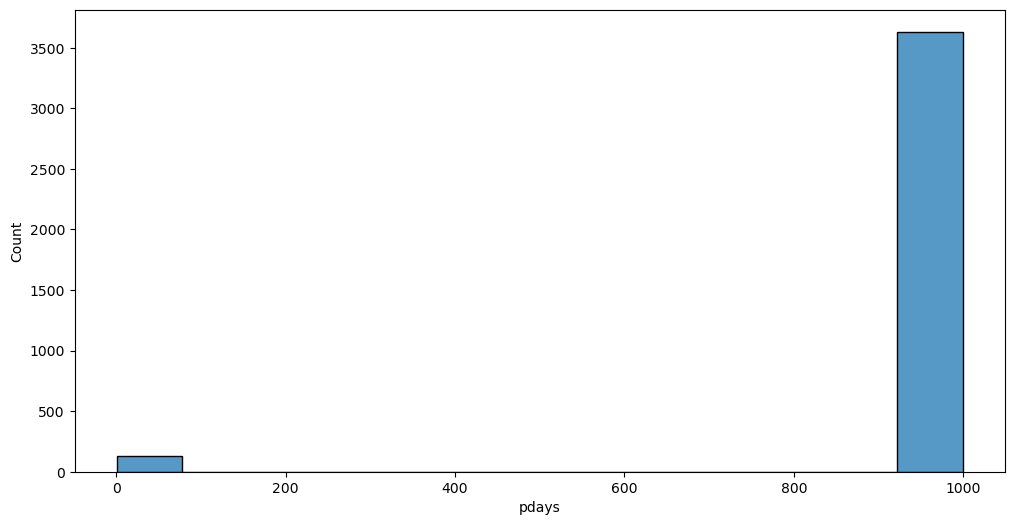

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pdays')

<Axes: xlabel='pdays', ylabel='Count'>

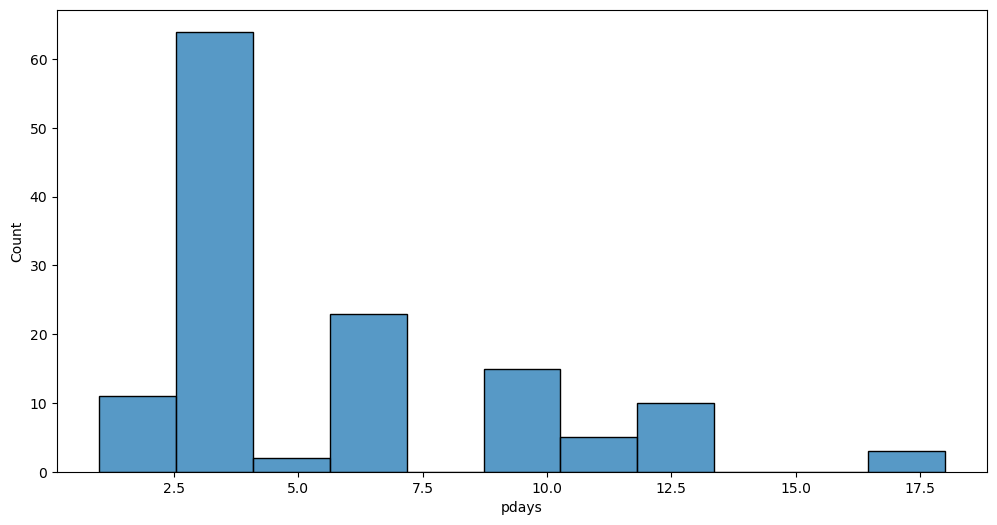

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['pdays'] != 999], x='pdays')

(0.0, 2000.0)

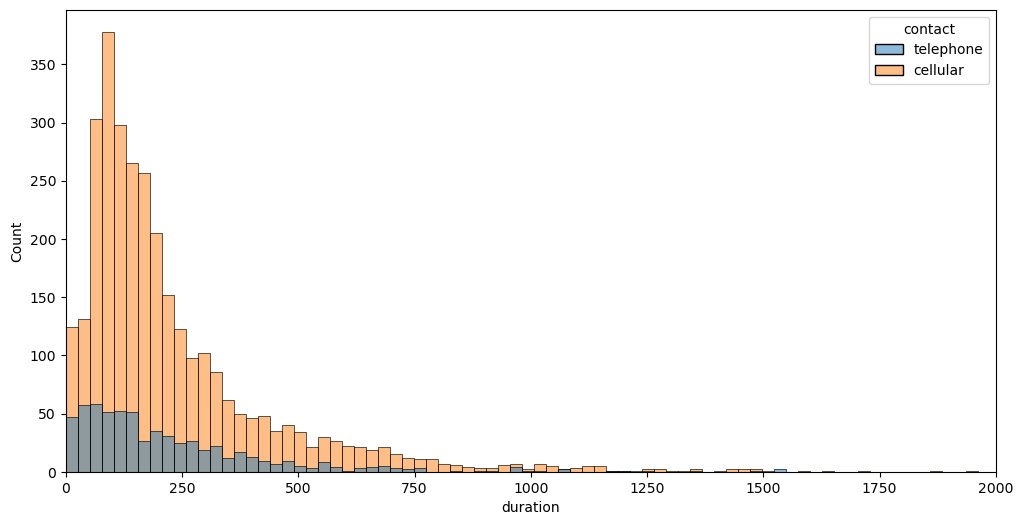

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 2000)

<Axes: xlabel='contact', ylabel='count'>

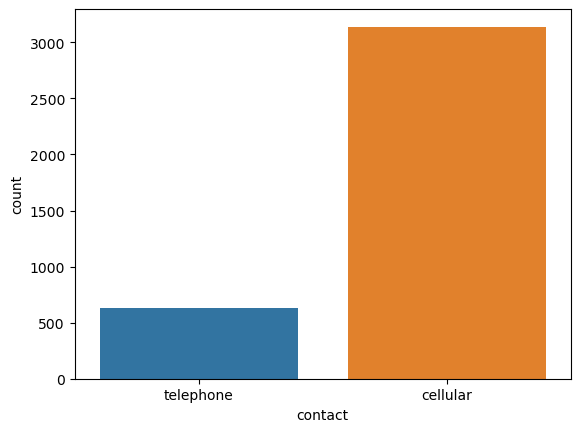

In [10]:
sns.countplot(data=df, x='contact')

### Categorical features

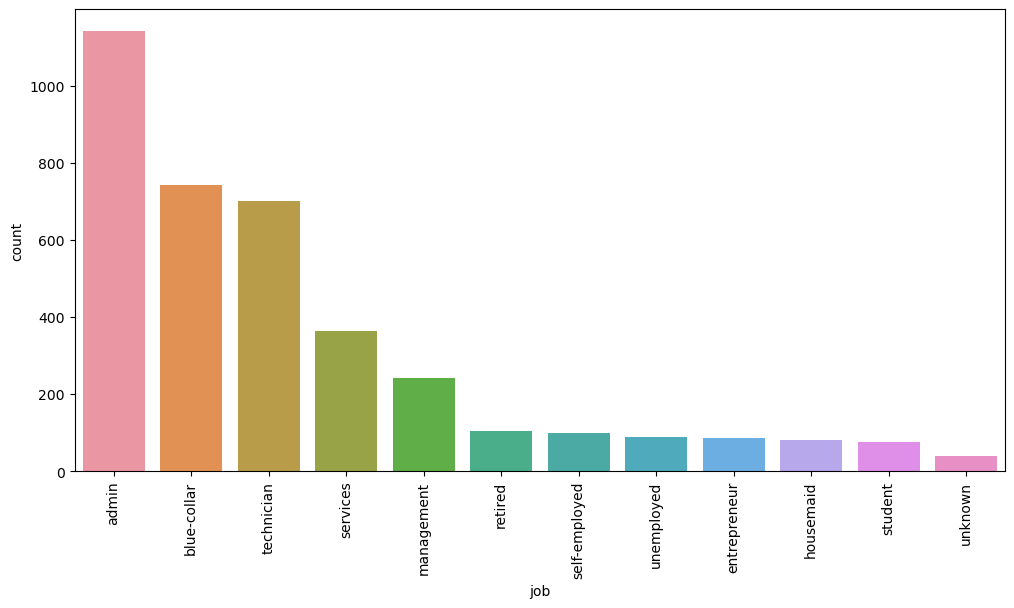

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

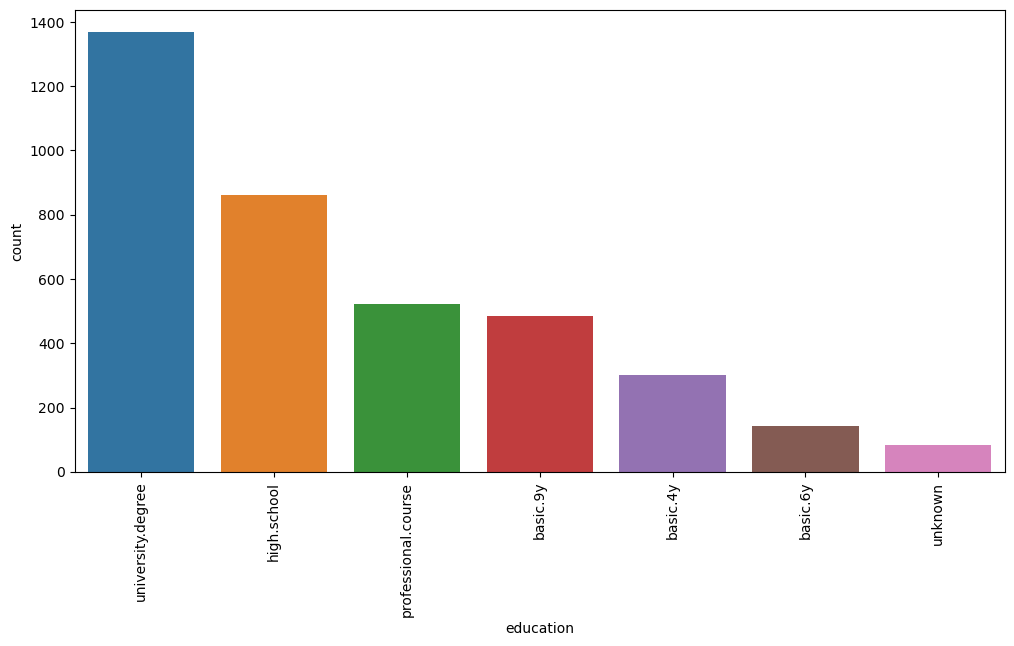

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

## Clustering

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [13]:
X = pd.get_dummies(df)
X

,age,duration,pdays,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,261,999,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,57,149,999,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,37,226,999,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,40,151,999,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,56,307,999,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,44,159,999,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3762,24,133,999,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3763,31,192,3,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3764,67,218,999,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=2, n_init=10)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([1, 1, 1, ..., 0, 1, 0])

In [18]:
X['Cluster'] = cluster_labels

In [19]:
X.corr()['Cluster']

age                             -0.006321
duration                         0.010225
pdays                            0.009320
job_admin                       -0.041367
job_blue-collar                  0.022765
job_entrepreneur                 0.000662
job_housemaid                    0.020655
job_management                   0.003894
job_retired                     -0.004096
job_self-employed                0.013893
job_services                     0.014987
job_student                     -0.003325
job_technician                   0.012792
job_unemployed                  -0.012862
job_unknown                     -0.026038
education_basic.4y               0.010805
education_basic.6y               0.042323
education_basic.9y               0.012835
education_high.school           -0.024136
education_professional.course   -0.002781
education_university.degree     -0.012762
education_unknown                0.012919
loan_no                          1.000000
loan_unknown                    -0

<Axes: >

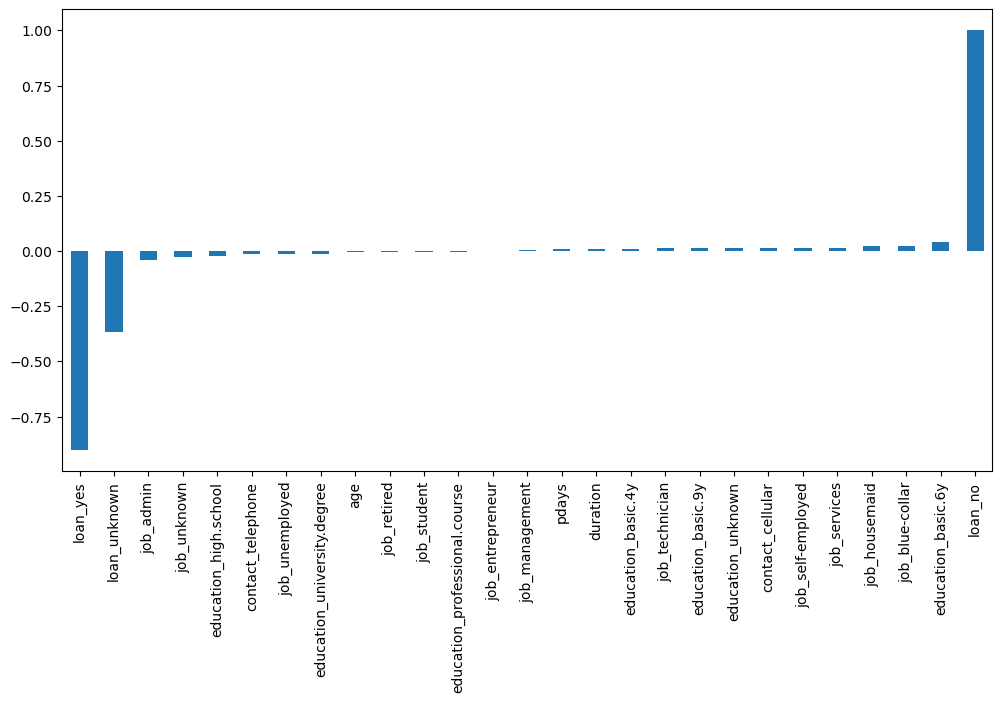

In [20]:
plt.figure(figsize=(12, 6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing K value

In [21]:
sum_squared_distances = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(scaled_X)
    
    # sum of squared distances of samples to their closest cluster center
    sum_squared_distances.append(model.inertia_)

In [22]:
sum_squared_distances

[94000.9293733044,
 89010.4077969881,
 83056.57022711962,
 78866.34459804354,
 75110.3747176165,
 71868.9406183163,
 67646.61463782418,
 63413.05748098966]

Text(0, 0.5, 'Sum of Squared Distances')

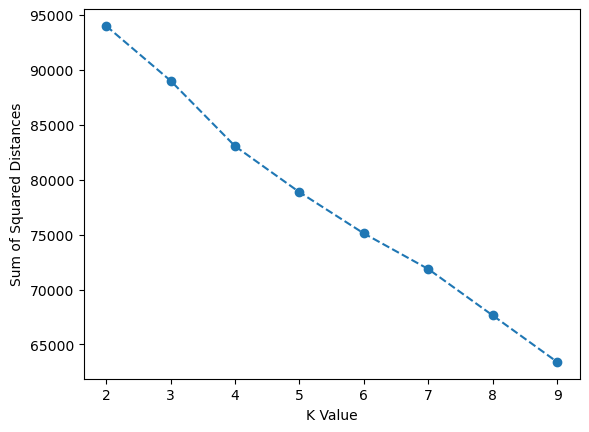

In [23]:
plt.plot(range(2, 10), sum_squared_distances, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [24]:
pd.Series(sum_squared_distances).diff()

0            NaN
1   -4990.521576
2   -5953.837570
3   -4190.225629
4   -3755.969880
5   -3241.434099
6   -4222.325980
7   -4233.557157
dtype: float64

<Axes: >

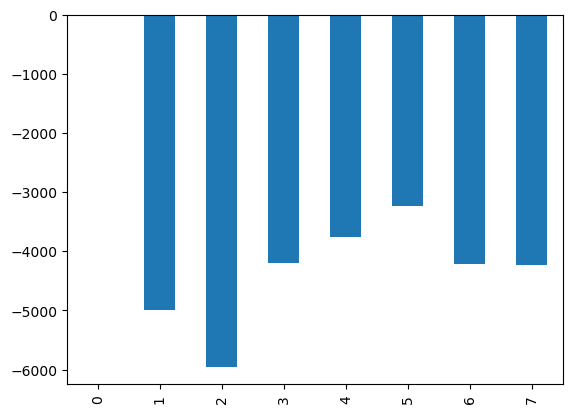

In [25]:
pd.Series(sum_squared_distances).diff().plot(kind='bar')